<a href="https://colab.research.google.com/github/luoKobe/gpt-ai-assistant/blob/main/AI_%E8%87%AA%E5%8B%95%E5%8C%96%E8%A8%AD%E8%A8%88%EF%BC%88PartC%EF%BC%89_%E4%B8%80%E6%AC%A1%E7%BE%A4%E7%99%BC%E5%A4%9AP%E9%81%8B%E5%8B%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#AI 自動化設計（PartC）


##產出第一個GAS程式
```
// 定義一個名為helloWorld的函數
function helloWorld() {
  // 使用Logger物件的log方法來輸出文字
  // Logger是GAS提供的一個工具，用於記錄和顯示訊息
  Logger.log("Hello World"); // 在日誌中輸出"Hello World"
}
```



##與Google試算表的連結

```
// 定義函數 readData，無參數
function readData() {
    // 獲取當前活動的試算表並選取當前活動的工作表
    var sheet = SpreadsheetApp.getActiveSpreadsheet().getActiveSheet();
    
    // 獲取工作表中所有數據範圍的值，並將其存儲在變量 data 中
    var data = sheet.getDataRange().getValues();
    
    // 將數據範圍中的所有值記錄到日誌中，方便調試
    Logger.log(data);
}

```

##將結果寫入試算表中
```
// 定義一個名為helloWorld的函數
function helloWorld() {
  // 使用Logger物件的log方法來輸出文字
  // Logger是GAS提供的一個工具，用於記錄和顯示訊息
  Logger.log("Hello World"); // 在日誌中輸出"Hello World"

  // 指定 Google 試算表的 ID，此 ID 可在試算表的網址中找到
  var spreadsheetId = '您的Google試算表ID'; // 替換成您的試算表ID

  // 打開指定的 Google 試算表
  var spreadsheet = SpreadsheetApp.openById(spreadsheetId); // 通過ID打開試算表

  // 獲取試算表中的 "工作表1"
  var sheet = spreadsheet.getSheetByName('工作表1'); // 獲取名為"工作表1"的工作表

  // 將 "Hello World" 寫入 "工作表1" 的 A1 儲存格
  sheet.getRange('A1').setValue('Hello World'); // 在A1儲存格中設置值"Hello World"
}
```

##時間驅動觸發器
###設置每日觸發器

```
function createTimeDrivenTriggers() {
    // 刪除所有現有的觸發器，以避免重複設置
    deleteTriggers();

    // 創建一個觸發器，設置為每天凌晨1點執行 myFunction
    ScriptApp.newTrigger('myFunction')
        .timeBased()
        .atHour(1)
        .everyDays(1)
        .create();
}

function deleteTriggers() {
    // 獲取所有已設置的觸發器
    var allTriggers = ScriptApp.getProjectTriggers();

    // 刪除每個觸發器
    for (var i = 0; i < allTriggers.length; i++) {
        ScriptApp.deleteTrigger(allTriggers[i]);
    }
}

// 要執行的函數
function myFunction() {
    Logger.log("這是每日執行的任務");
}

```

###事件驅動觸發器
####設置編輯觸發器

```
function createEditTrigger() {
    // 刪除所有現有的觸發器，以避免重複設置
    deleteTriggers();

    // 創建一個觸發器，當用戶編輯試算表時執行 onEdit
    ScriptApp.newTrigger('onEdit')
        .forSpreadsheet(SpreadsheetApp.getActiveSpreadsheet())
        .onEdit()
        .create();
}

function deleteTriggers() {
    // 獲取所有已設置的觸發器
    var allTriggers = ScriptApp.getProjectTriggers();

    // 刪除每個觸發器
    for (var i = 0; i < allTriggers.length; i++) {
        ScriptApp.deleteTrigger(allTriggers[i]);
    }
}

// 當試算表被編輯時要執行的函數
function onEdit(e) {
    var range = e.range;
    var value = range.getValue();
    Logger.log("編輯了單元格 " + range.getA1Notation() + " 新值為: " + value);
}


```


###部署為Web應用程式
####步驟1：編寫腳本
~~~
// 這個函數處理GET請求，返回一個HTML頁面
function doGet() {
    return HtmlService.createHtmlOutput("<h1>嗨,大家一起學習GAS樂開懷!</h1>");
}

// 這個函數處理POST請求
function doPost(e) {
    var data = e.parameter.data;
    return ContentService.createTextOutput("You posted: " + data);
}

~~~

##每天來張早安圖
```
var images = [
  'https://drive.google.com/uc?export=view&id=1N59hZgy7K59xSfNIKVkpg2PRMMmEzw3u',
  'https://drive.google.com/uc?export=view&id=1kIHVIonMAON26a2cXnimGTSpowrm-lJ0',
  'https://drive.google.com/uc?export=view&id=1tdAC_eLxMux1oOYQ8bHJbowIzraGqlGv',
  'https://drive.google.com/uc?export=view&id=1P4MH3YAc5wB2q-Ff2X1BO5_410plmohE',
  'https://drive.google.com/uc?export=view&id=1zJFx1pqiDOS1VrP2zKHvOFVVmWPdc4HW',
  'https://drive.google.com/uc?export=view&id=1H67NxMMvDCjEbptHVQjERgr6hLEbBfLB'
]; // 圖片的網址列表
var phrases = [
  '今日是新的開始，讓我們充滿希望地迎接它！',
  '每一天都是一次新的機會，不要放棄！',
  '保持積極，你會驚喜地發現生活的美好！',
  '笑容是最好的良藥，讓它照亮你的一天！',
  '相信自己，你比你想象的還要強大！',
  '擁抱挑戰，享受生活的每一刻！'
]; // 每日話語列表
// 定義主要函數，用於發送通知
function sendDailyMessage() {
  var image = getRandomItem(images); // 從圖片列表中隨機選擇一個
  var phrase = getRandomItem(phrases); // 從話語列表中隨機選擇一個

  sendToLineNotify(phrase); // 首先發送文字消息
  Utilities.sleep(1000); // 等待一秒鐘
  sendToLineNotify(image); // 然後發送圖片消息
}

// 隨機選擇列表中的一個項目的函數
function getRandomItem(list) {
  return list[Math.floor(Math.random() * list.length)]; // 隨機選擇一個項目
}

// 將消息發送到 Line Notify 的函數
function sendToLineNotify(message) {
  var token = '您的 LINE Notify 權杖'; // 替換成您的 LINE Notify 權杖
  var options = {
    'method': 'post',
    'headers': {
      'Authorization': 'Bearer ' + token
    },
    'payload': {
      'message': message
    }
  };

  UrlFetchApp.fetch('https://notify-api.line.me/api/notify', options); // 發送請求到 LINE Notify
}

```

###進化版早安圖與心靈雞湯
```
function sendLineNotifyMessage() {
  var token = "你的LINE權杖"; // 你的LINE權杖
  var folderName = "lineimages"; // 放置圖片的資料夾名稱
  var folders = DriveApp.getFoldersByName(folderName);

  if (!folders.hasNext()) {
    Logger.log('無法找到名為 ' + folderName + ' 的資料夾');
    return;
  }

  var folder = folders.next();
  var files = folder.getFiles();
  var fileArray = [];

  while (files.hasNext()) {
    var file = files.next();
    if (file.getMimeType() === 'image/jpeg') {
      fileArray.push(file.getId());
      Logger.log('找到JPG圖片：' + file.getName() + '，ID：' + file.getId());
    }
  }

  if (fileArray.length === 0) {
    Logger.log('資料夾中沒有JPG圖片');
    return;
  }

  // 隨機選擇JPG圖片
  var randomIndex = Math.floor(Math.random() * fileArray.length);
  var imageFileId = fileArray[randomIndex];
  Logger.log('選擇的圖片ID：' + imageFileId);

  try {
    var imageFile = DriveApp.getFileById(imageFileId).getBlob();
  } catch (e) {
    Logger.log('無法獲取ID為 ' + imageFileId + ' 的文件：' + e.message);
    return;
  }

  // 心靈雞湯語句
  var messages = [

    // 20則心靈雞湯語句...
  ];

  var message = messages[Math.floor(Math.random() * messages.length)];

 // var messageOptions = {
 //   "method": "POST",
 //   "headers": {"Authorization": "Bearer " + token},
 //   "payload": {'message': message}
 // };
// UrlFetchApp.fetch("https://notify-api.line.me/api/notify", messageOptions);

//  Utilities.sleep(5000);

var imageOptions = {
  "method": "POST",
  "headers": {"Authorization": "Bearer " + token},
  "payload": {
    'message': message, // 這裡將 'message' 改為變數 message，這樣才會發送變數中的文字
    'imageFile': imageFile    
    }
};
UrlFetchApp.fetch("https://notify-api.line.me/api/notify", imageOptions);
  };
  UrlFetchApp.fetch("https://notify-api.line.me/api/notify", imageOptions);
}

```


心靈雞湯文字
```
var messages = [
      '人生就像一本書，每一天都是新的一頁，充滿了可能性和機遇，讓我們積極地去填滿它。',
      '每個夢想都值得追求，即使前路充滿挑戰，勇敢地邁出一步，終將接近你的目標。',
      '當你感到失落時，記得轉身看看來時的路，你已經走得那麼遠，不要輕易放棄。',
      '生活不是等待暴風雨過去，而是要學會在雨中跳舞，把每個瞬間都活得精彩絕倫。',
      '面對困難時，不要害怕，勇氣就像肌肉一樣，越用越強，越戰越勇。',
      '人生沒有白走的路，每一步都算數，每一次努力都會有回報，只要你不放棄。',
      '過去無法改變，但未來還在你手中，每一天都是一個全新的開始。',
      '失敗不是終點，它只是告訴我們要換一個角度去看問題，繼續向前。',
      '真正的勇氣不是不害怕，而是即使害怕也願意面對挑戰，勇往直前。',
      '每個成功的背後，都有無數次的努力和汗水，不要怕付出，因為這些都是通往夢想的必經之路。',
      '不要讓恐懼阻擋你前進的步伐，勇敢地追求你的夢想，最終會收獲成功。',
      '總有一天，你會感謝現在努力的自己，因為你所付出的一切，將成就未來的你。',
      '每一個不願意放棄的日子，都會成為成功的基石，堅持下去，終會有所成就。',
      '記住，你比你想象中要強大，面對挑戰時，相信自己，你有無限的潛力。',
      '你的態度決定你的高度，樂觀積極地面對生活，你會發現世界如此美好。',
      '成功的路上不會永遠順風順水，但只要你不停歇，總會到達目的地。',
      '別急於求成，每一個階段都有它的意義，慢慢來，會走得更遠。',
      '人生就像爬山，不在乎達到的高度，而在乎沿途的風景和看風景的心情。',
      '記住，最困難的時候，往往就是離成功不遠的時候，堅持就是勝利。',
      '生命太短暫，不要浪費時間在懷疑自己上，相信自己，你值得最好的。',
    ];
```


#一次群發多P運動

```
const API_URL = "https://notify-api.line.me/api/notify";

function sendMessagesAndImages() {
  var sheet = SpreadsheetApp.getActiveSpreadsheet().getActiveSheet();
  var data = sheet.getRange('B1:B' + sheet.getLastRow()).getValues();
  var message = data[0][0]; // 從B1單元格獲取訊息內容
  var imageUrl = data[1][0]; // 從B2單元格獲取圖片URL

  for (var i = 2; i < data.length; i++) {
    var token = data[i][0]; // 獲取B列中的Token
    if (token) {
      sendLineNotify(token, message, imageUrl);
      Utilities.sleep(10000); // 發送訊息和圖片後總共等待10秒
    }
  }
}

function sendLineNotify(token, message, imageUrl) {
  sendNotifyMessage(token, message); // 發送訊息
  Utilities.sleep(5000); // 訊息發送後等待5秒

  if (imageUrl) {
    sendNotifyImage(token, imageUrl); // 發送圖片
  }
}

function sendNotifyMessage(token, message) {
  var options = {
    "method": "POST",
    "headers": {"Authorization": "Bearer " + token},
    "payload": {
      'message': message
    }
  };

  try {
    UrlFetchApp.fetch(API_URL, options);
  } catch (e) {
    Logger.log("發送訊息時出錯: " + e.message);
  }
}

function sendNotifyImage(token, imageUrl) {
  var options = {
    "method": "POST",
    "headers": {"Authorization": "Bearer " + token},
    "payload": {
      'message': '\uDBC0\uDC84', // 空白字符，用於僅發送圖片
      'imageThumbnail': imageUrl,
      'imageFullsize': imageUrl
    }
  };

  try {
    UrlFetchApp.fetch(API_URL, options);
  } catch (e) {
    Logger.log("發送圖片時出錯: " + e.message);
  }
}

```

###Mermaid語法![1.jpg](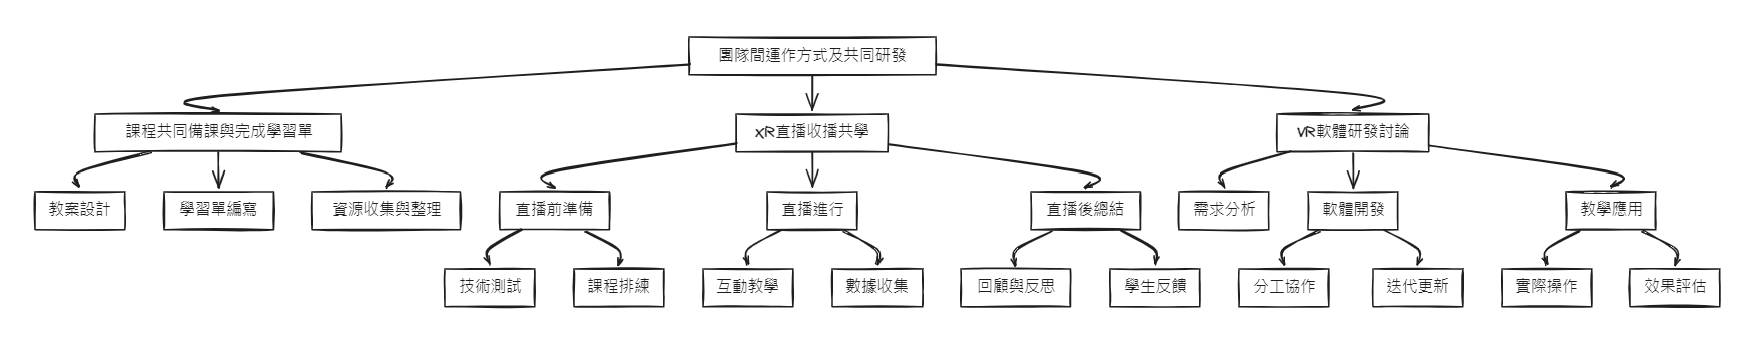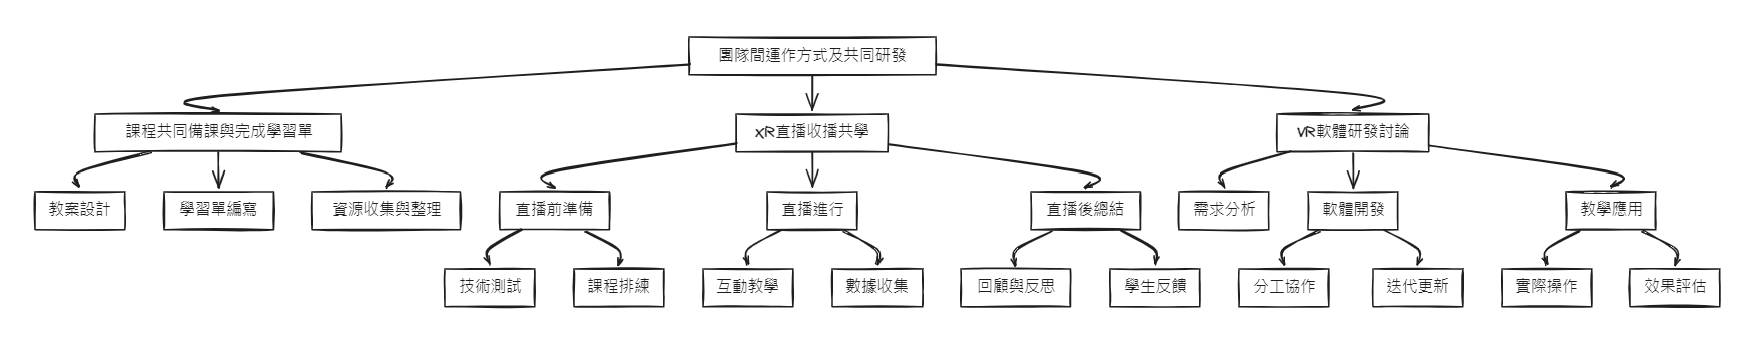)

~~~
graph TD
    A[團隊間運作方式及共同研發]

    A1[課程共同備課與完成學習單]
    A2[XR直播收播共學]
    A3[VR軟體研發討論]

    A --> A1
    A --> A2
    A --> A3

    A1_1[教案設計]
    A1_2[學習單編寫]
    A1_3[資源收集與整理]

    A1 --> A1_1
    A1 --> A1_2
    A1 --> A1_3

    A2_1[直播前準備]
    A2_2[直播進行]
    A2_3[直播後總結]

    A2 --> A2_1
    A2 --> A2_2
    A2 --> A2_3

    A2_1_1[技術測試]
    A2_1_2[課程排練]

    A2_1 --> A2_1_1
    A2_1 --> A2_1_2

    A2_2_1[互動教學]
    A2_2_2[數據收集]

    A2_2 --> A2_2_1
    A2_2 --> A2_2_2

    A2_3_1[回顧與反思]
    A2_3_2[學生反饋]

    A2_3 --> A2_3_1
    A2_3 --> A2_3_2

    A3_1[需求分析]
    A3_2[軟體開發]
    A3_3[教學應用]

    A3 --> A3_1
    A3 --> A3_2
    A3 --> A3_3

    A3_2_1[分工協作]
    A3_2_2[迭代更新]

    A3_2 --> A3_2_1
    A3_2 --> A3_2_2

    A3_3_1[實際操作]
    A3_3_2[效果評估]

    A3_3 --> A3_3_1
    A3_3 --> A3_3_2

~~~


###亮的~AI 翻譯器


#### doPost().gs 檔案
負責接收訊息和處理回覆的主要函式，

doPost 是 Google Apps Script 中的一種特殊函式，用於處理 HTTP POST 請求。

當你在自定義的 Google Apps Script 網頁應用程式中收到 POST 請求時，doPost 函式會自動被執行。你可以在這個函式中編寫程式碼來處理接收到的資料。


doPost 函式有以下的特點：


它接收一個 e 參數，代表請求的資訊。你可以使用 e 參數來存取請求的資料，例如 POST 的內容、請求的標頭等等。

doPost 函式必須回傳一個回應物件，該物件包含回應的內容和標頭。

~~~
Line_Bot_Token = "將您的Channel access token 輸入在此";
Line_Bot_API = "https://api.line.me/v2/bot/message/reply";

ChatGPT_Access_Token = "將您的ChatGPT API KEY 輸入在此";
Ask_Key_Word = "請問:"

function doPost(e) {
  try {
    if (e && e.postData && e.postData.contents) {
      var oPostData = JSON.parse(e.postData.contents);    // 取得 Bot 收到的資訊
      var sReplyToken = oPostData.events[0].replyToken;
      var sUserMsgText = oPostData.events[0].message.text;

      // 以下狀況不回覆
      if (!sUserMsgText) { return; }
      if (sUserMsgText.indexOf(Ask_Key_Word) === -1) {
        sResponse = '如果想問問題的話，請開頭請用 ' + Ask_Key_Word + '再接著問題內容即可哦!';
      } else {
        // 呼叫ChatGPT API
        var sGPTReceive = chatGPT_api(sUserMsgText.replace(Ask_Key_Word, ""));
        var sResponse = JSON.parse(sGPTReceive.getContentText()).choices[0].message.content;
      }

      pushLineBotMessage(sResponse, sReplyToken);
    } else {
      Logger.log('Invalid POST request: ' + JSON.stringify(e));
    }
  } catch (err) {
    Logger.log('Error in doPost: ' + err.message);
  }
  return ContentService.createTextOutput(JSON.stringify({ "status": "success" })).setMimeType(ContentService.MimeType.JSON); // 返回成功狀態
}

~~~

####chatGPT_api().gs檔案
負責GPT的串接在主程式 doPost() 中 chatGPT_api(sUserMsgText.replace(Ask_Key_Word, “”)) 呼叫用到這個函式

~~~
function chatGPT_api(sMsg) {
  return UrlFetchApp.fetch('https://api.openai.com/v1/chat/completions', {
    'method': 'post',
    'headers': {
      'Content-Type': 'application/json',
      'Authorization': 'Bearer ' + ChatGPT_Access_Token,
    },
    'payload': JSON.stringify({
      "model": "gpt-4", // 使用GPT-4模型
      "messages": [{"role": "user", "content": sMsg}],
      "temperature": 0.7,
      "max_tokens": 150
    }),
  });
}

~~~

####pushLineBotMessage().gs
 負責LINEBOT訊息回覆
在主程式 doPost() 中 pushLineBotMessage(sResponse, sReplyToken) 呼叫用到這個函式

~~~
function pushLineBotMessage(sMsg, sReplyToken) {
  var linePayload = {
    'replyToken': sReplyToken,
    'messages': [
      {
        'type': 'text',
        'text': sMsg
      }
    ]
  };

  var lineOptions = {
    'method': 'post',
    'headers': {
      'Content-Type': 'application/json; charset=UTF-8',
      'Authorization': 'Bearer ' + Line_Bot_Token
    },
    'payload': JSON.stringify(linePayload)
  };

  UrlFetchApp.fetch(Line_Bot_API, lineOptions);  // 把訊息送出
}
~~~

###亦可以合併以上3個檔案為一個

~~~
// 設定LINE和ChatGPT的API金鑰和URL
var Line_Bot_Token = "將您的Channel access token 輸入在此";
var Line_Bot_API = "https://api.line.me/v2/bot/message/reply";
var ChatGPT_Access_Token = "將您的ChatGPT API KEY 輸入在此";
var Ask_Key_Word = "請問:";

// 主函數，當收到LINE訊息時被觸發
function doPost(e) {
  try {
    if (e && e.postData && e.postData.contents) {
      var oPostData = JSON.parse(e.postData.contents);    // 取得Bot收到的資訊
      var sReplyToken = oPostData.events[0].replyToken;
      var sUserMsgText = oPostData.events[0].message.text;

      // 以下狀況不回覆
      if (!sUserMsgText) { return; }
      if (sUserMsgText.indexOf(Ask_Key_Word) === -1) {
        var sResponse = '如果想問問題的話，請開頭請用 ' + Ask_Key_Word + '再接著問題內容即可哦!';
      } else {
        // 呼叫ChatGPT API
        var sGPTReceive = chatGPT_api(sUserMsgText.replace(Ask_Key_Word, ""));
        var sResponse = JSON.parse(sGPTReceive.getContentText()).choices[0].message.content;
      }

      // 回覆訊息給LINE
      pushLineBotMessage(sResponse, sReplyToken);
    } else {
      Logger.log('Invalid POST request: ' + JSON.stringify(e));
    }
  } catch (err) {
    Logger.log('Error in doPost: ' + err.message);
  }
  return ContentService.createTextOutput(JSON.stringify({ "status": "success" })).setMimeType(ContentService.MimeType.JSON); // 返回成功狀態
}

// 呼叫ChatGPT API進行翻譯
function chatGPT_api(sMsg) {
  return UrlFetchApp.fetch('https://api.openai.com/v1/chat/completions', {
    'method': 'post',
    'headers': {
      'Content-Type': 'application/json',
      'Authorization': 'Bearer ' + ChatGPT_Access_Token,
    },
    'payload': JSON.stringify({
      "model": "gpt-4", // 使用GPT-4模型
      "messages": [{"role": "user", "content": sMsg}],
      "temperature": 0.7,
      "max_tokens": 150
    }),
  });
}

// 回覆訊息給LINE
function pushLineBotMessage(sMsg, sReplyToken) {
  var linePayload = {
    'replyToken': sReplyToken,
    'messages': [
      {
        'type': 'text',
        'text': sMsg
      }
    ]
  };

  var lineOptions = {
    'method': 'post',
    'headers': {
      'Content-Type': 'application/json; charset=UTF-8',
      'Authorization': 'Bearer ' + Line_Bot_Token
    },
    'payload': JSON.stringify(linePayload)
  };

  UrlFetchApp.fetch(Line_Bot_API, lineOptions);  // 把訊息送出
}
~~~